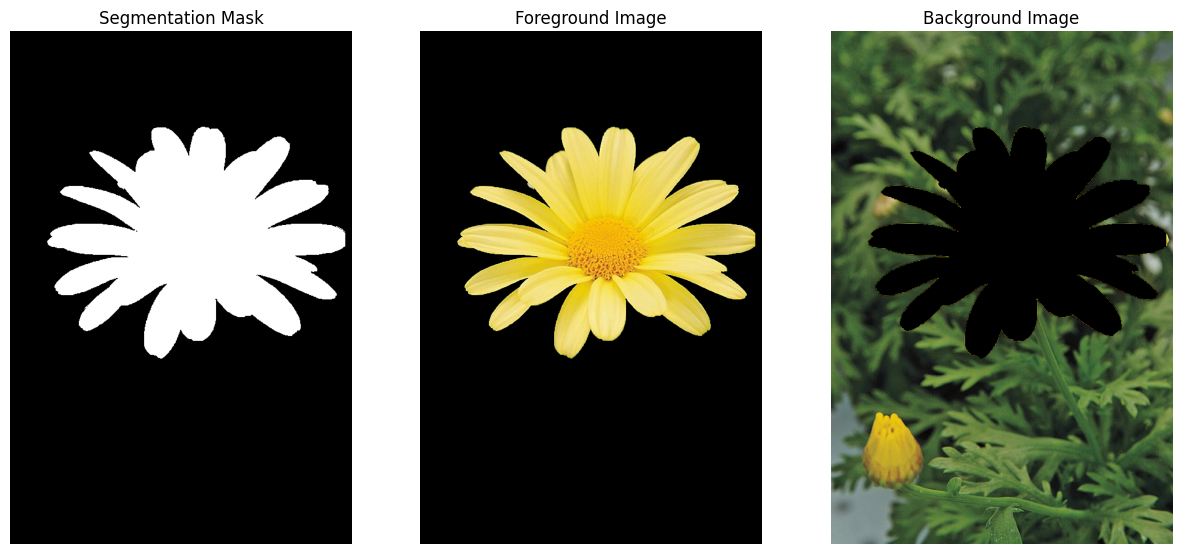

In [1]:
# Part A
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'path_to_your_image' with the actual image path)
img = cv.imread(r"a1images/a1images/daisy.jpg", cv.IMREAD_COLOR)

# Create a mask with the same dimensions as the image
mask = np.zeros(img.shape[:2], np.uint8)

# Define the bounding box for the foreground object
# (x, y, width, height)
rect = (50 , 50, 500, 500)

# Create a background model and a foreground model
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv.GC_INIT_WITH_RECT)

# Modify the mask to create a binary mask
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Create the foreground and background images
foreground = img * mask2[:, :, np.newaxis]
background = img * (1 - mask2[:, :, np.newaxis])

# Plotting the results
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

# Final segmentation mask
ax[0].imshow(mask2, cmap='gray')
ax[0].set_title("Segmentation Mask")
ax[0].axis('off')

# Foreground image
ax[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Image")
ax[1].axis('off')

# Background image
ax[2].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[2].set_title("Background Image")
ax[2].axis('off')

plt.show()


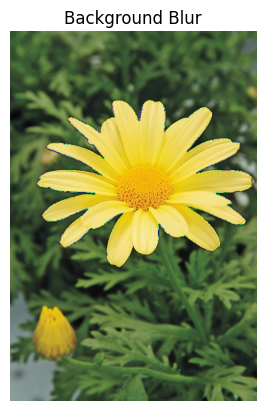

In [2]:
#part B

background_blur = cv.GaussianBlur(background, (5, 5), 4)
result = background_blur + foreground
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB) )
plt.title("Background Blur")
plt.axis('off')
plt.show()